 # Extract-Transform-Load some Amazon dataset and find for me
 # Sales-trend -> month-wise, year-wise, yearly_month-wise

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

df = pd.read_csv("Amazon Sales data.csv")

In [2]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [3]:
df.shape

(100, 14)

In [4]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [5]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [7]:
# Convert the Order Date and Ship Date columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [8]:
# Calculate the total revenue, total cost, and total profit for each sale
df['Total Revenue'] = df['Units Sold'] * df['Unit Price']
df['Total Cost'] = df['Units Sold'] * df['Unit Cost']
df['Total Profit'] = df['Total Revenue'] - df['Total Cost']

In [9]:
# Calculate the month, year, and year-month for each sale
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order YearMonth'] = df['Order Date'].dt.to_period('M')

In [10]:
# Calculate the sales trend for each month, year, and year-month
monthly_sales = df.groupby(['Order Month'])['Total Profit'].sum()
annual_sales = df.groupby(['Order Year'])['Total Profit'].sum()
year_month_sales = df.groupby(['Order YearMonth'])['Total Profit'].sum()

In [11]:

# Calculate the key metrics and factors for each sale
df['Units Sold Per Order'] = df['Units Sold'] / df['Order ID'].map(df.groupby('Order ID')['Units Sold'].count())
df['Avg Unit Price'] = df['Total Revenue'] / df['Units Sold']
df['Avg Unit Cost'] = df['Total Cost'] / df['Units Sold']

In [12]:

# Save the results to CSV files
monthly_sales.to_csv('Monthly Sales.csv')
annual_sales.to_csv('Annual Sales.csv')
year_month_sales.to_csv('Year-Month Sales.csv')
df.to_csv('Cleaned Sales Data.csv')


In [13]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit',
       'Order Month', 'Order Year', 'Order YearMonth', 'Units Sold Per Order',
       'Avg Unit Price', 'Avg Unit Cost'],
      dtype='object')

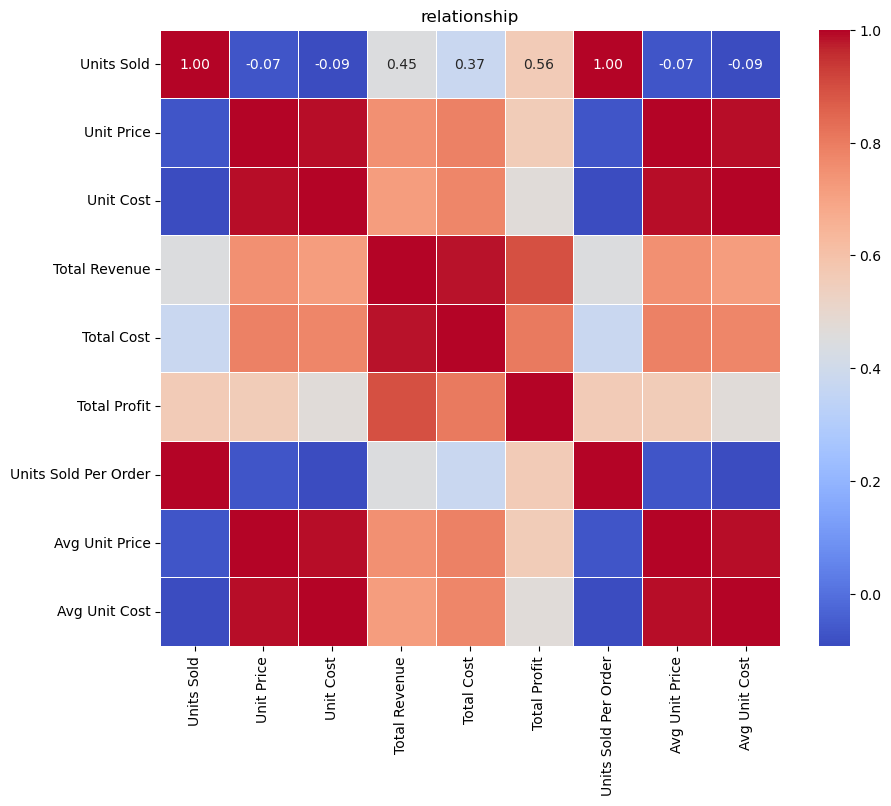

In [14]:
columns_of_interest = [ 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit',
        'Units Sold Per Order',
       'Avg Unit Price', 'Avg Unit Cost']

# Select the columns of interest and calculate the correlation matrix
correlation_matrix = df[columns_of_interest].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,  annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('relationship')
plt.show()

In [17]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Amazon Sales data.csv')

# Extract the date and revenue columns
data['Order Date'] = pd.to_datetime(data['Order Date'])
revenue_data = data[['Order Date', 'Total Revenue']]

# Transform the date into year and month columns
revenue_data['Year'] = revenue_data['Order Date'].dt.year
revenue_data['Month'] = revenue_data['Order Date'].dt.month

# Group the data by year and month and calculate the sum of total revenue
sales_trend = revenue_data.groupby(['Year', 'Month'])['Total Revenue'].sum().reset_index()

# Print the sales trend
print(sales_trend)

    Year  Month  Total Revenue
0   2010      2     3410661.12
1   2010      5     2587973.26
2   2010      6     1082418.40
3   2010     10     6064933.75
4   2010     11     3458252.00
5   2010     12     2581786.39
6   2011      1     1042225.35
7   2011      2      387002.20
8   2011      4     2798046.49
9   2011      5      272410.45
10  2011      6       19103.44
11  2011      7       97040.64
12  2011      9      574951.92
13  2011     11     5938385.58
14  2012      1     1012884.00
15  2012      2     6707849.42
16  2012      3      994765.42
17  2012      4     4556012.38
18  2012      5     3782781.82
19  2012      6     2132075.27
20  2012      7     4445093.92
21  2012      8      576782.80
22  2012      9     4648152.72
23  2012     10     3042246.77
24  2013      2     3296425.02
25  2013      3      835759.10
26  2013      4     3262562.10
27  2013      6     1352867.40
28  2013      7     8545511.20
29  2013      8       89623.98
30  2013      9       71253.21
31  2013

In [22]:
# Read the CSV file
df = pd.read_csv('Amazon Sales data.csv')

# Extract the data
sales_data = df.groupby(['Region', 'Country', 'Item Type', 'Sales Channel'])['Total Revenue'].sum()

# Transform the data
sales_data = sales_data.reset_index()

# Load the transformed data into a new CSV file
sales_data.to_csv('Amazon Sales Trends.csv', index=False)

In [26]:
df=pd.read_csv('Amazon Sales Trends.csv')
df.head(10)

,Region,Country,Item Type,Sales Channel,Total Revenue
0,Asia,Bangladesh,Clothes,Online,902980.64
1,Asia,Brunei,Office Supplies,Online,4368316.68
2,Asia,Kyrgyzstan,Vegetables,Online,19103.44
3,Asia,Laos,Vegetables,Offline,574951.92
4,Asia,Malaysia,Fruits,Offline,58471.11
5,Asia,Mongolia,Personal Care,Offline,400558.73
6,Asia,Myanmar,Clothes,Online,648030.40
7,Asia,Myanmar,Household,Offline,5513227.50
8,Asia,Sri Lanka,Cosmetics,Offline,3039414.40
9,Asia,Turkmenistan,Household,Offline,2559474.10
